# GAIA Clustering & Analysis
#### -------------------------------------------------------------------------
## Data importation from **.vot

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
from sklearn.cluster import DBSCAN
from sklearn import cluster

import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

In [65]:
name_list = ["M67", "NGC2516", "NGC752", "NGC1039", "NGC1342", "NGC1647"]
clustername = "M67"
RADIUS       = 0.5
errtol       = 0.10
weight       = [6,1,1,3,3,3,3,3];  weight=weight/np.max(weight)
eps          = 0.15
min_samples  = 15

In [66]:
source = gu.source(clustername, RADIUS, errtol)
source.read_votable()
source.convert_filter_data()
source.convert_to_cartesian()
source.set_weight(weight)
source.normalization_normal()

## M67-0.5deg-0.1err.vot read...
## Total stars: 1456

## Conversion done...
## Stars selected: 1432
## Normalization done on filtered data..


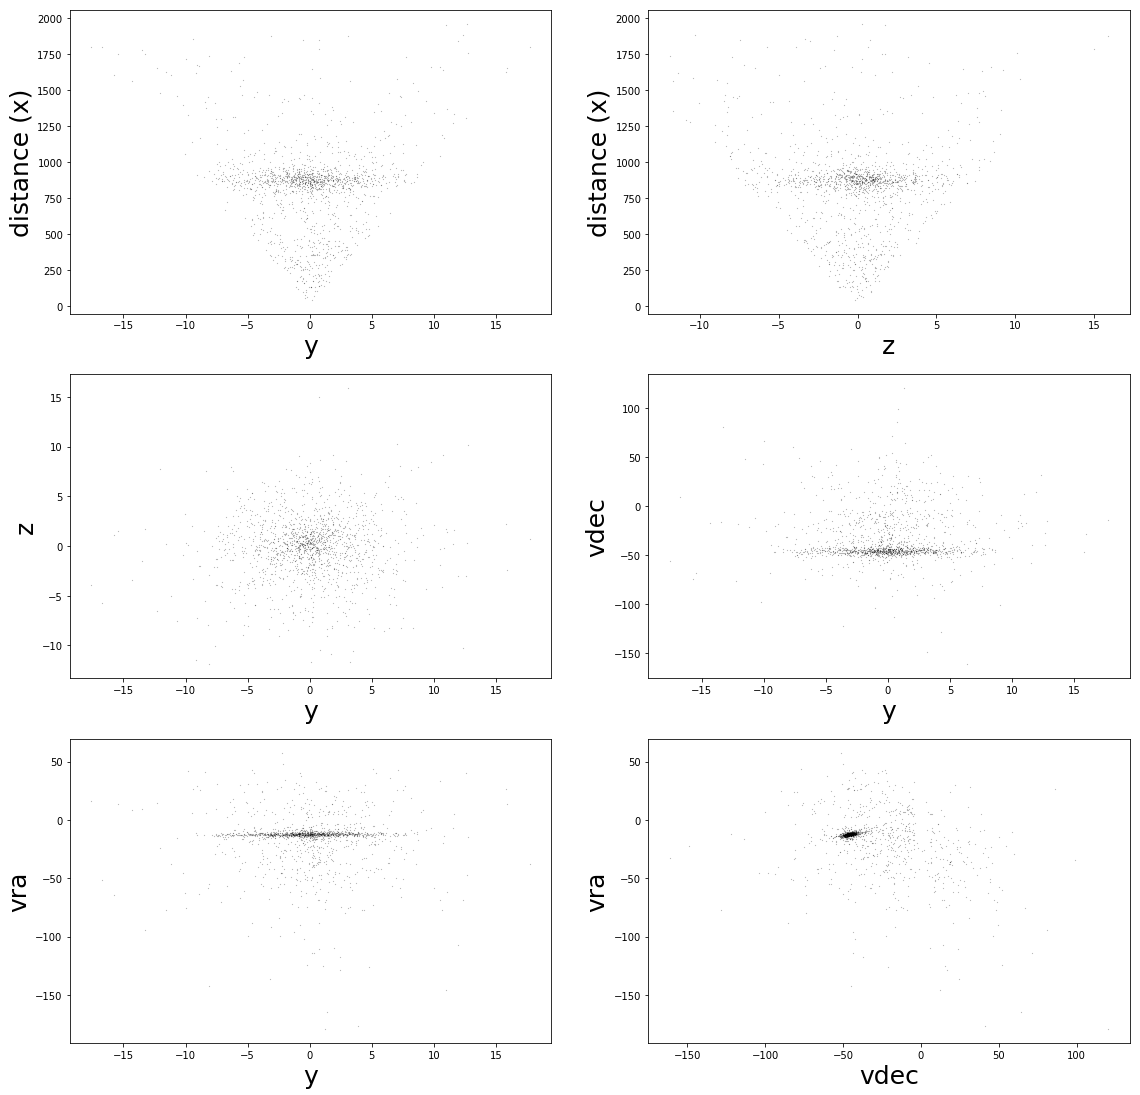

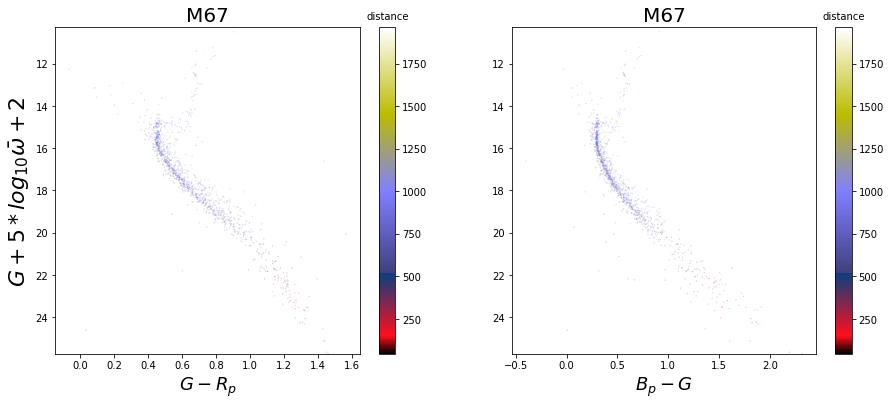

In [67]:
source.plot_information(0.01,True)
#source.plot_3D(0.01,True)

#### -------------------------------------------------------------
### Normalisation

## Normalization done on filtered data..
## Normalization done on filtered data..
## Normalization done on filtered data..


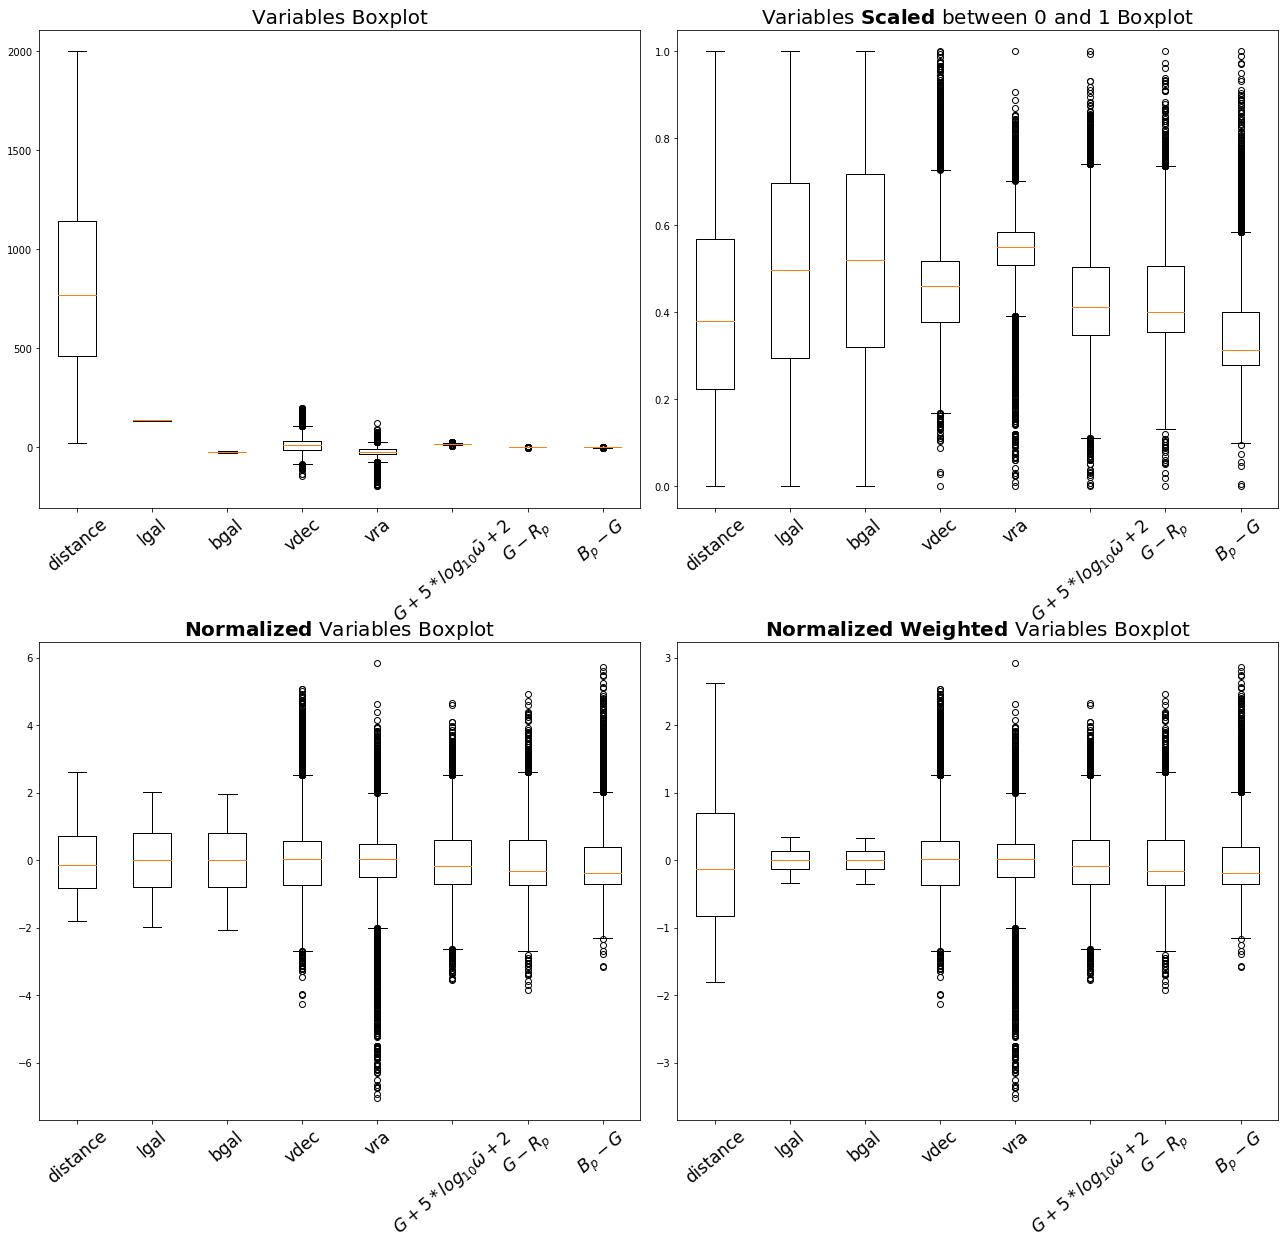

In [60]:
source.set_weight([1,1,1,1,1,1,1,1])
source.normalization_minmax()
plt.figure(figsize=(18,16))
plt.subplot(221)
plt.title("Variables Boxplot", fontsize=20)
plt.boxplot(source.df)
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.subplot(222)
plt.title(r'Variables $\bf{Scaled}$ between 0 and 1 Boxplot', fontsize=20)
plt.boxplot(source.dfnorm)
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.subplot(223); plt.tight_layout()
source.normalization_normal()
plt.title(r'$\bf{Normalized}$ Variables Boxplot', fontsize=20)
plt.boxplot(source.dfnorm)
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.subplot(224)
source.set_weight(weight)
source.normalization_normal()
plt.title(r'$\bf{Normalized}$ $\bf{Weighted}$ Variables Boxplot', fontsize=20)
plt.boxplot(source.dfnorm)
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.show()

# -------------------------------------------------------------
## DBSCAN Clustering Method

In [58]:
from sklearn.cluster import DBSCAN
from sklearn import cluster
from sklearn import metrics
source.set_weight(weight)
source.normalization_normal()

## Normalization done on filtered data..


In [2]:
eps_ = np.arange(5,100,5)
eps_ = np.arange(0.08,0.3,0.01)
print(eps_)
print(np.arange(5,100,5))

[0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21
 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29]
[ 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [54]:
# #############################################################################
# Compute DBSCAN
#eps_ = [0.12,0.13,0.14,0.15,0.16,0.17]
#min_samples_ = [10,15,20,30,40,50]
eps_ = np.arange(0.08,0.3,0.01)
min_samples_ = np.arange(5,100,5)
mat_nb_clusters = np.zeros((len(eps_),len(min_samples_)))
mat_max = np.zeros((len(eps_),len(min_samples_)))
for i in range(len(eps_)) :
    for j in range(len(min_samples_)) :
        db = DBSCAN(eps=eps_[i], min_samples=min_samples_[j]).fit(source.dfnorm*weight)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        mat_nb_clusters[i,j] = n_clusters_
        max_label = 0
        for n in range(n_clusters_) :
            ilabel = np.where(labels == n)[0]
            if len(ilabel) > max_label : max_label = len(ilabel)
        mat_max[i,j] = max_label
        print("Ok pour eps "+str(eps_[i])+" et min_samples="+str(min_samples_[j]))

Ok pour eps 0.08 et min_samples=5
Ok pour eps 0.08 et min_samples=10
Ok pour eps 0.08 et min_samples=15
Ok pour eps 0.08 et min_samples=20
Ok pour eps 0.08 et min_samples=25
Ok pour eps 0.08 et min_samples=30
Ok pour eps 0.08 et min_samples=35
Ok pour eps 0.08 et min_samples=40
Ok pour eps 0.08 et min_samples=45
Ok pour eps 0.08 et min_samples=50
Ok pour eps 0.08 et min_samples=55
Ok pour eps 0.08 et min_samples=60
Ok pour eps 0.08 et min_samples=65
Ok pour eps 0.08 et min_samples=70
Ok pour eps 0.08 et min_samples=75
Ok pour eps 0.08 et min_samples=80
Ok pour eps 0.08 et min_samples=85
Ok pour eps 0.08 et min_samples=90
Ok pour eps 0.08 et min_samples=95
Ok pour eps 0.09 et min_samples=5
Ok pour eps 0.09 et min_samples=10
Ok pour eps 0.09 et min_samples=15
Ok pour eps 0.09 et min_samples=20
Ok pour eps 0.09 et min_samples=25
Ok pour eps 0.09 et min_samples=30
Ok pour eps 0.09 et min_samples=35
Ok pour eps 0.09 et min_samples=40
Ok pour eps 0.09 et min_samples=45
Ok pour eps 0.09 et mi

Ok pour eps 0.16999999999999996 et min_samples=30
Ok pour eps 0.16999999999999996 et min_samples=35
Ok pour eps 0.16999999999999996 et min_samples=40
Ok pour eps 0.16999999999999996 et min_samples=45
Ok pour eps 0.16999999999999996 et min_samples=50
Ok pour eps 0.16999999999999996 et min_samples=55
Ok pour eps 0.16999999999999996 et min_samples=60
Ok pour eps 0.16999999999999996 et min_samples=65
Ok pour eps 0.16999999999999996 et min_samples=70
Ok pour eps 0.16999999999999996 et min_samples=75
Ok pour eps 0.16999999999999996 et min_samples=80
Ok pour eps 0.16999999999999996 et min_samples=85
Ok pour eps 0.16999999999999996 et min_samples=90
Ok pour eps 0.16999999999999996 et min_samples=95
Ok pour eps 0.17999999999999994 et min_samples=5
Ok pour eps 0.17999999999999994 et min_samples=10
Ok pour eps 0.17999999999999994 et min_samples=15
Ok pour eps 0.17999999999999994 et min_samples=20
Ok pour eps 0.17999999999999994 et min_samples=25
Ok pour eps 0.17999999999999994 et min_samples=30
O

Ok pour eps 0.24999999999999994 et min_samples=95
Ok pour eps 0.2599999999999999 et min_samples=5
Ok pour eps 0.2599999999999999 et min_samples=10
Ok pour eps 0.2599999999999999 et min_samples=15
Ok pour eps 0.2599999999999999 et min_samples=20
Ok pour eps 0.2599999999999999 et min_samples=25
Ok pour eps 0.2599999999999999 et min_samples=30
Ok pour eps 0.2599999999999999 et min_samples=35
Ok pour eps 0.2599999999999999 et min_samples=40
Ok pour eps 0.2599999999999999 et min_samples=45
Ok pour eps 0.2599999999999999 et min_samples=50
Ok pour eps 0.2599999999999999 et min_samples=55
Ok pour eps 0.2599999999999999 et min_samples=60
Ok pour eps 0.2599999999999999 et min_samples=65
Ok pour eps 0.2599999999999999 et min_samples=70
Ok pour eps 0.2599999999999999 et min_samples=75
Ok pour eps 0.2599999999999999 et min_samples=80
Ok pour eps 0.2599999999999999 et min_samples=85
Ok pour eps 0.2599999999999999 et min_samples=90
Ok pour eps 0.2599999999999999 et min_samples=95
Ok pour eps 0.269999

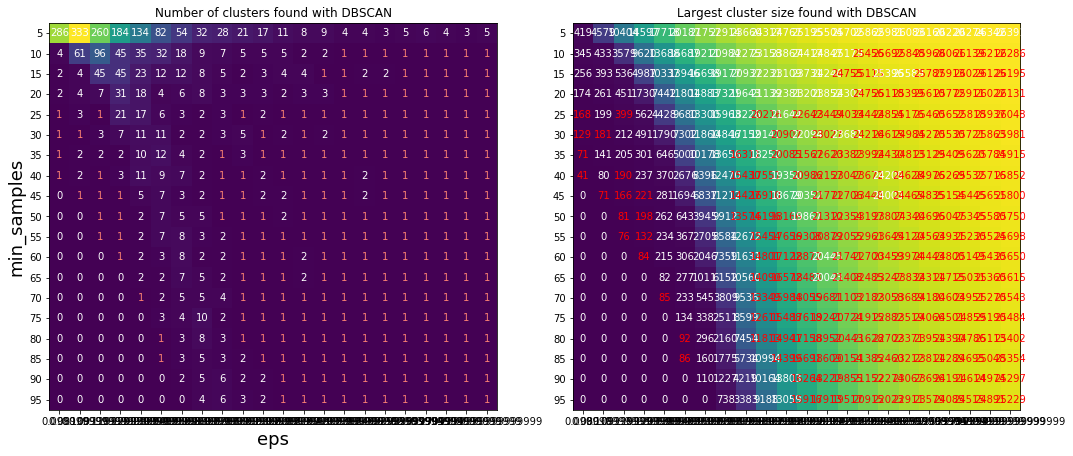

In [55]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(15,15))

im = ax.imshow(mat_nb_clusters.T)
ax.set_xticks(np.arange(len(eps_)))
ax.set_yticks(np.arange(len(min_samples_)))
ax.set_xticklabels(eps_)
ax.set_yticklabels(min_samples_)
# Loop over data dimensions and create text annotations.
for i in range(len(eps_)):
    for j in range(len(min_samples_)):
        if mat_nb_clusters[i, j] == 1 : color = "salmon"
        else : color = "w" 
        text = ax.text(i, j, '%d'%mat_nb_clusters[i, j],
                       ha="center", va="center", color=color, fontproperties='bold')
ax.set_title("Number of clusters found with DBSCAN")
ax.set_xlabel("eps", fontsize = 18)
ax.set_ylabel("min_samples", fontsize = 18)
fig.tight_layout()

im = ax2.imshow(mat_max.T)
ax2.set_xticks(np.arange(len(eps_)))
ax2.set_yticks(np.arange(len(min_samples_)))
ax2.set_xticklabels(eps_)
ax2.set_yticklabels(min_samples_)
# Loop over data dimensions and create text annotations.
for i in range(len(eps_)):
    for j in range(len(min_samples_)):
        if mat_nb_clusters[i, j] == 1 : color = "r"
        else : color = "w" 
        text = ax2.text(i, j, '%d'%mat_max[i, j], ha="center", va="center", color=color)
ax2.set_title("Largest cluster size found with DBSCAN")
ax.set_xlabel("eps", fontsize = 18)
ax.set_ylabel("min_samples", fontsize = 18)
fig.tight_layout()

plt.savefig('NGC752.png')
plt.show()

In [111]:
source.set_weight(weight)
source.normalization_normal()

ilabel = source.dbscan_labels(eps=0.20, min_samples=15, display=True)

## Normalization done on filtered data..
56 clusters, size of the largest: 3179


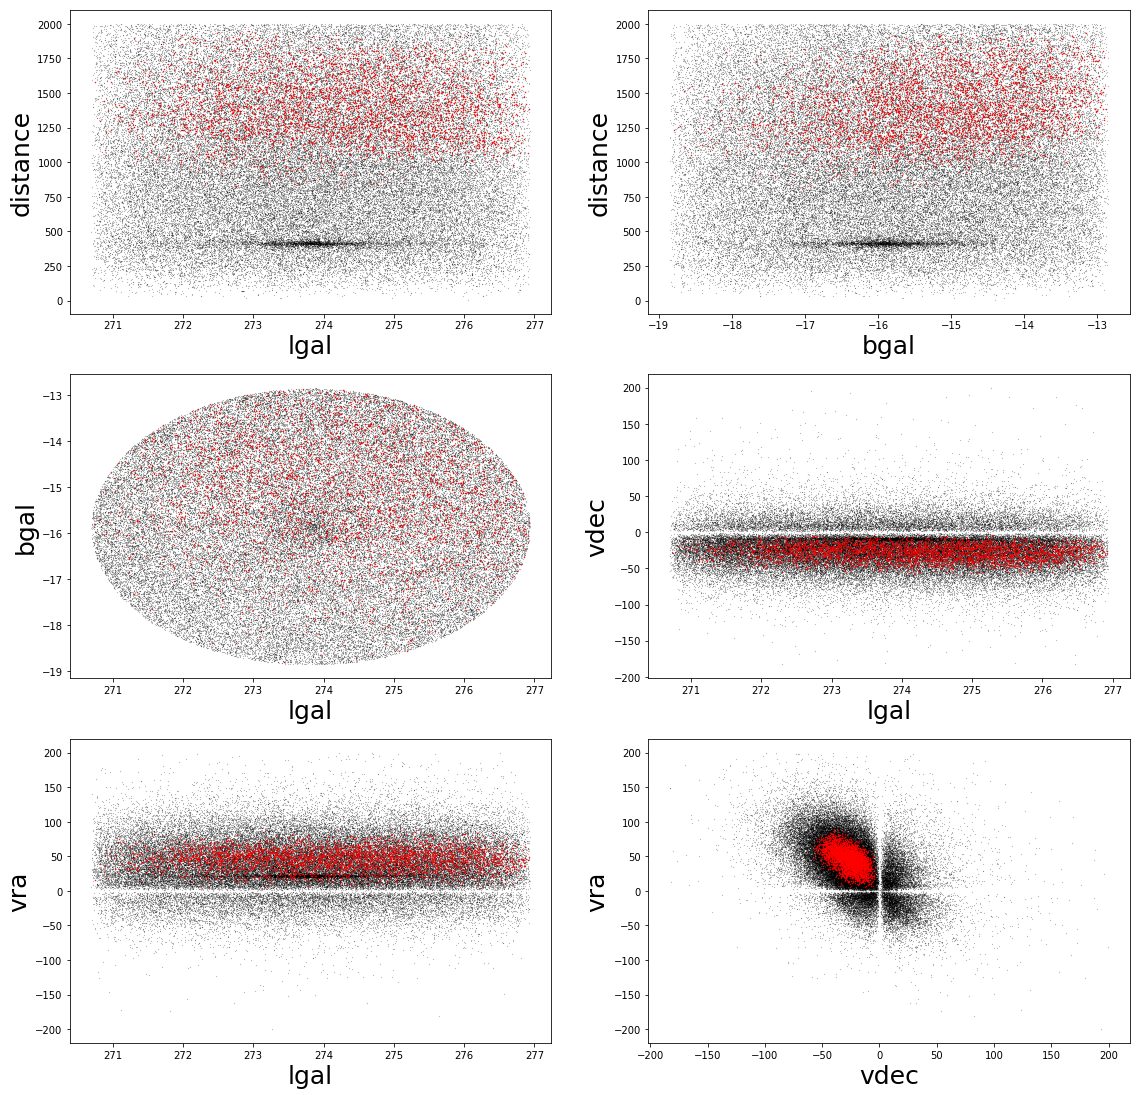

In [112]:
source.plot_information(0.01,False, HRD=False, ilabel=ilabel)

AttributeError: 'source' object has no attribute 'dfcart'

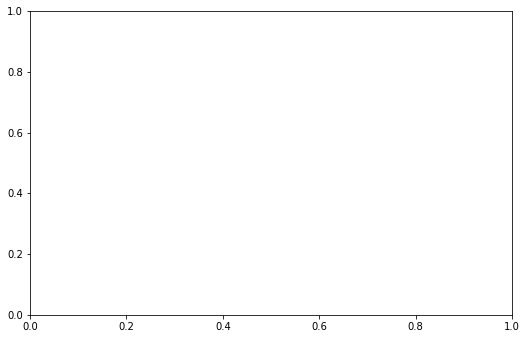

In [113]:
source.plot_information(0.01,True, HRD=False, ilabel=ilabel)
source.plot_3D(0.01,True,(0,6,5),ilabel=ilabel)

For NGC2516
## NGC2516-3.0deg-0.1err.vot read...
## Total stars: 79407

## Conversion done...
## Stars selected: 66786
## Normalization done on filtered data..
22 clusters, size of the largest: 2895


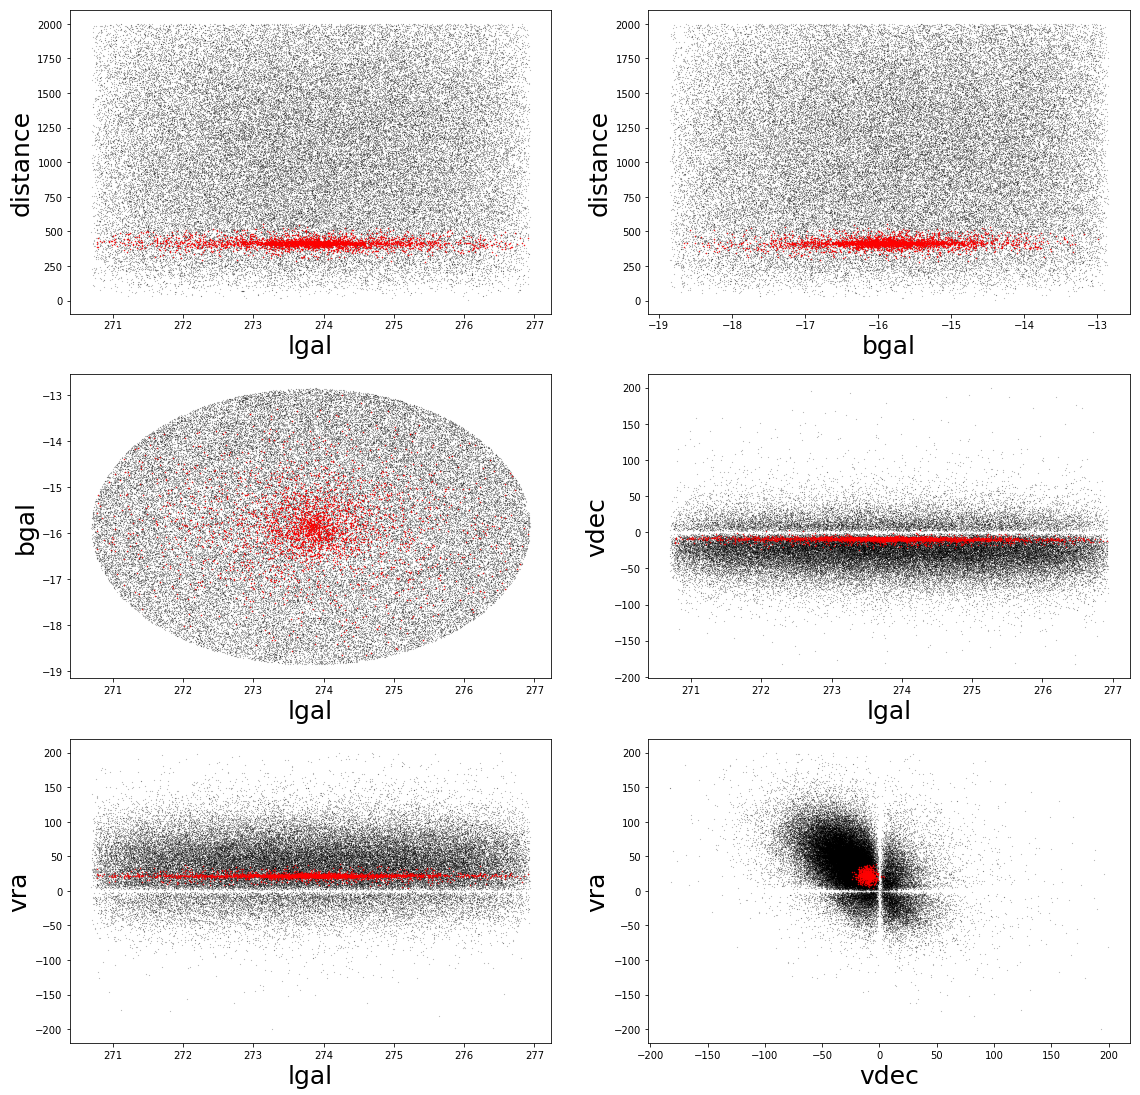

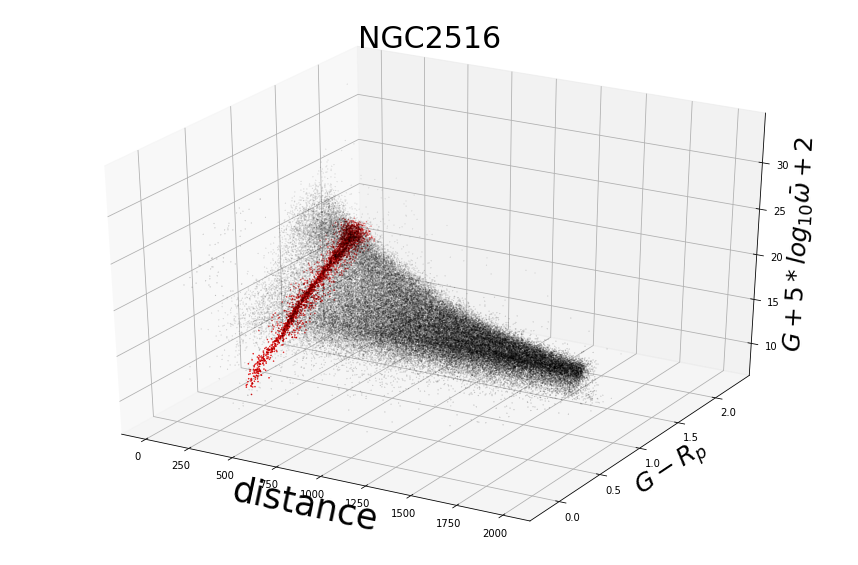

In [110]:
name_list = ["M67", "NGC2516", "NGC752", "NGC1039", "NGC1342", "NGC1647"]
clustername = "NGC752"
result = {}
for clustername in ["NGC2516"] :

    print("For "+str(clustername))
    RADIUS       = 3.
    errtol       = 0.10
    weight       = [6,1,1,3,3,3,3,3];  weight=weight/np.max(weight)
    eps          = 0.20
    min_samples  = 20
    t_init       = time.clock()
    source = gu.source(clustername, RADIUS, errtol)
    source.read_votable()
    source.convert_filter_data()

    source.set_weight(weight)
    source.normalization_normal()

    ilabel = source.dbscan_labels(eps=eps, min_samples=min_samples, display=True)
    
    result[clustername] = {}
    result[clustername]['eps'] = eps
    result[clustername]['min_samples'] = min_samples
    
    result[clustername]['ilabel'] = ilabel
    result[clustername]['data'] = source.df[ilabel,:]
    result[clustername]['density'] = source.dfnorm.shape[0]
    result[clustername]['time'] = time.clock() - t_init

    source.plot_information(0.01,False, HRD=False, ilabel=ilabel)
    source.plot_3D(0.01,False,(0,6,5),ilabel=ilabel)
    
#with open('DBSCAN_Results', 'wb') as fichier:
#    mon_pickler = pickle.Pickler(fichier)
#    mon_pickler.dump(result)

9 clusters, size of the largest: 40


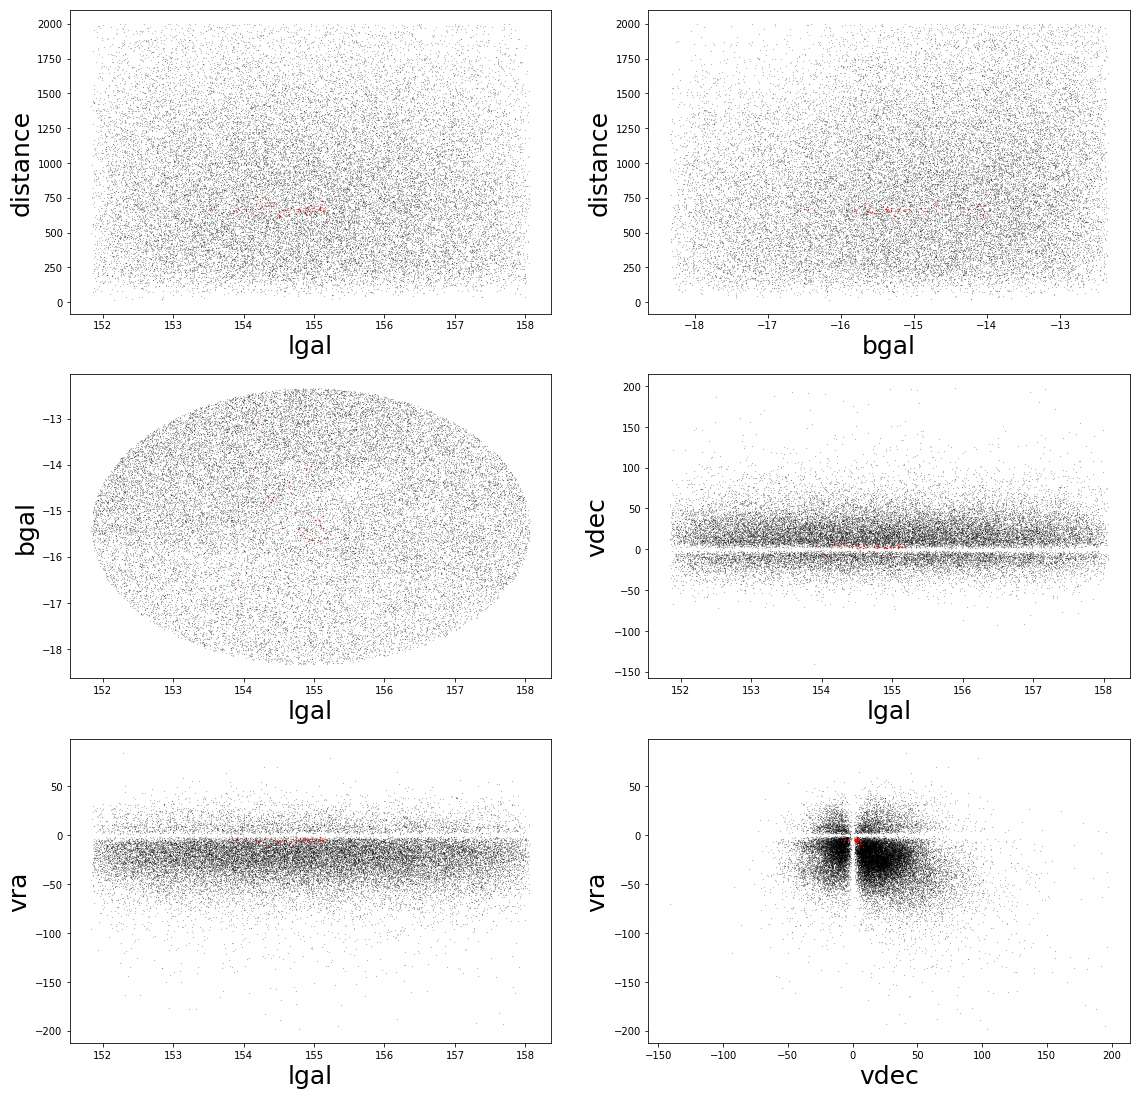

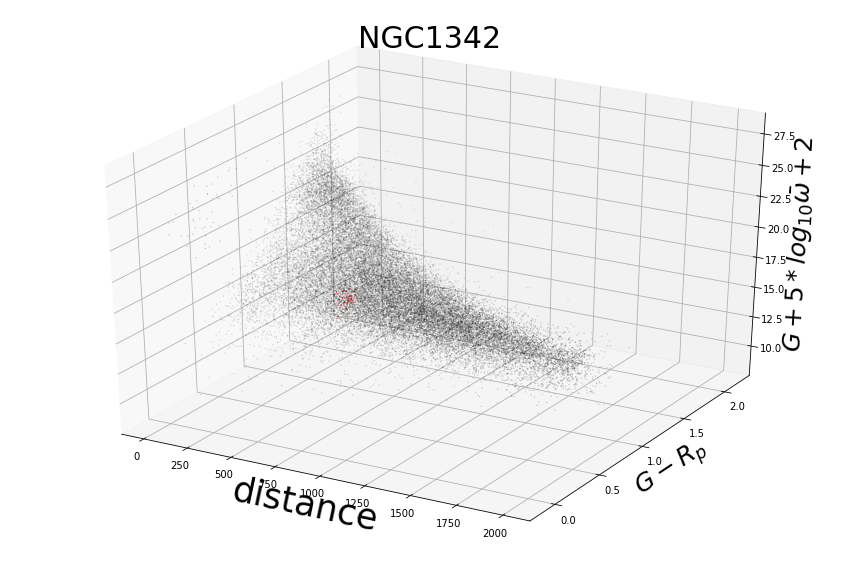

In [108]:
eps          = 0.23
ilabel = source.dbscan_labels(eps=eps, min_samples=min_samples, display=True)
source.plot_information(0.01,False, HRD=False, ilabel=ilabel)
source.plot_3D(0.01,False,(0,6,5),ilabel=ilabel)

In [105]:
print(np.mean(source.df[:,2]))
print(np.argwhere(np.isnan(pre_result[clustername]['data'][:,2])))

-14.972035168777177
[]


In [96]:
for clustername in name_list[1:] :
    print("%7s -> %6d  (bgal:%3.1f)"%(clustername,result[clustername]['density'],np.mean(result[clustername]['data'][:,2])))
    print("%7s -> %6d"%("",result[clustername]['density']))

NGC2516 ->  66786  (bgal:-15.8)
        ->  66786
 NGC752 ->  26760  (bgal:-23.3)
        ->  26760
NGC1039 ->  29200  (bgal:-15.7)
        ->  29200
NGC1342 ->  28090  (bgal:nan)
        ->  28090
NGC1647 ->  23890  (bgal:-16.8)
        ->  23890


In [97]:
pre_result = result

In [39]:
theorical_dist = [409, 457, 499, 640, 540]
for i, j in zip(Dist,[1,2,3,4,5]) :
    print("## For "+str(name_list[j])+"  (%d stars)"%len(i))
    print("# mean Dist:   %.1f"%np.mean(i))
    print("# median Dist: %.1f"%np.median(i))
    print("# theorical  : %d\n"%theorical_dist[j-1])

## For NGC2516  (2628 stars)
# mean Dist:   415.6
# median Dist: 414.4
# theorical  : 409

## For NGC752  (211 stars)
# mean Dist:   448.7
# median Dist: 447.7
# theorical  : 457

## For NGC1039  (152 stars)
# mean Dist:   514.3
# median Dist: 511.7
# theorical  : 499

## For NGC1342  (17 stars)
# mean Dist:   660.2
# median Dist: 660.9
# theorical  : 640

## For NGC1647  (306 stars)
# mean Dist:   595.9
# median Dist: 594.3
# theorical  : 540



## -----------------------------------------------------------

In [62]:
kCluster = 10
############# 
print("## Spectral...")
spectral = cluster.SpectralClustering(n_clusters = kCluster, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(source.dfnorm)
labels_s = spectral.labels_
for i in range(kCluster):
    print("# Label %5d : %5d  Dist: %6.1f (%5.1f)"%(i,len(labels_s[np.where(labels_s == i)]), np.median(source.df[np.where(labels_s == i),0]),np.std(source.df[np.where(labels_s == i),0])))
print("##")

## Spectral...
# Label     0 :  5357  Dist: 1051.6 (190.7)
# Label     1 :  2357  Dist:  779.4 (264.7)
# Label     2 :  3460  Dist:  468.3 (157.5)
# Label     3 :  1838  Dist: 1475.0 (202.2)
# Label     4 :  4754  Dist:  785.9 (268.8)
# Label     5 :  4363  Dist:  515.1 (196.3)
# Label     6 :    40  Dist:  153.5 ( 86.9)
# Label     7 :   629  Dist: 1524.9 (202.2)
# Label     8 :  2280  Dist:  255.7 ( 89.8)
# Label     9 :  1682  Dist: 1608.2 (166.6)
##


In [ ]:
score = {"joueur 1":5,"joueur 2":35,"joueur 3":20,"joueur 4":2,}
with open('donnees', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(score)
with open('donnees', 'rb') as fichier:
    mon_depickler = pickle.Unpickler(fichier)
    score_recupere = mon_depickler.load()

In [63]:
import time
t = time.clock()
print(time.clock()-t)

0.00021681992314225525
